# Kaggle Competiton
- https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/overview
- Note : [Link](https://www.notion.so/parkjaeyoung/Kaggle-4147f4c9dd0b43e284d697c1cb6d7875?pvs=4https://www.notion.so/parkjaeyoung/Kaggle-4147f4c9dd0b43e284d697c1cb6d7875?pvs=4)

# Data & PreProcessing  

In [17]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np


import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder


In [6]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

print('train data dim : {}'.format(df_train.shape))
print('sub data dim : {}'.format(df_test.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


In [7]:
display(df_train.head())
display(df_test.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## 데이터 전처리(PreProcessing)_1
    - df : df_train + df_test 
    - df_train_processed : price 상관 관계 파악용

In [8]:
df = df_train.copy()

In [9]:
## To_Library
def date_to_y(x):
    str_ym = x[:6]
    y = str_ym[:4]
    return int(y)

def date_to_m(x):
    str_ym = x[:6]
    m = str_ym[4:]
    return int(m)

In [10]:
df['year'] = df['date'].apply(date_to_y)
df['month'] = df['date'].apply(date_to_m)

In [11]:
df.drop('date',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15035 non-null  float64
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [13]:
# 데이터 전처리 : df_train _ df_test Merge 위해 Price 값 분리 
len_train = df_train.shape[0]
df_train_processed = df_train.drop('price',axis=1)

# df_train_process Log Scaling
y = np.log1p(df_train['price'].values)

# df 생성, 테스트를 위해 id 값 구분 후 삭제 
df = pd.concat([df_train_processed,df_test],axis=0)
test_id = df.iloc[len_train:,0]

# date -> year , month 
for df_temp in [df_train_processed,df]:

    del df_temp['id']

    # 년 월 컬럼 생성 후 , date Column 삭제 
    df_temp['year'] = df_temp['date'].apply(date_to_y)
    df_temp['month'] = df_temp['date'].apply(date_to_m)
    del df_temp['date']

## 데이터 전처리(PreProcessing)_2

    - (*) 1차 시도 : All Feature -> Log Scaling **
    - 2차 시도 : Feature Selection -> Log Scaling -> PCA() -> Outliesr
    - 3차 시도 : Feature Selection + Combination Feature -> Log Scaling -> PCA()

#카테고리 특성 분류
 - Category_feature : 'grade', 'condition','view', 'waterfront',  'year', 'month','zip_code'
 - Log_feature      : 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_built'
 - Geo_feature      : 'lat', 'long'

In [14]:
category_col = ['grade', 'condition','view', 'waterfront', 'year', 'month','zipcode']
log_col = ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_built']
geo_col = ['lat', 'long']

selected_col = category_col + log_col + geo_col

selected_col

['grade',
 'condition',
 'view',
 'waterfront',
 'year',
 'month',
 'zipcode',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long']

## Label Encoding

In [15]:
category_col

['grade', 'condition', 'view', 'waterfront', 'year', 'month', 'zipcode']

In [18]:
le = LabelEncoder()

for col in category_col:
    le.fit(df[col])
    df[col] = le.transform(df[col])

## Log Scaling

In [19]:
log_col

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built']

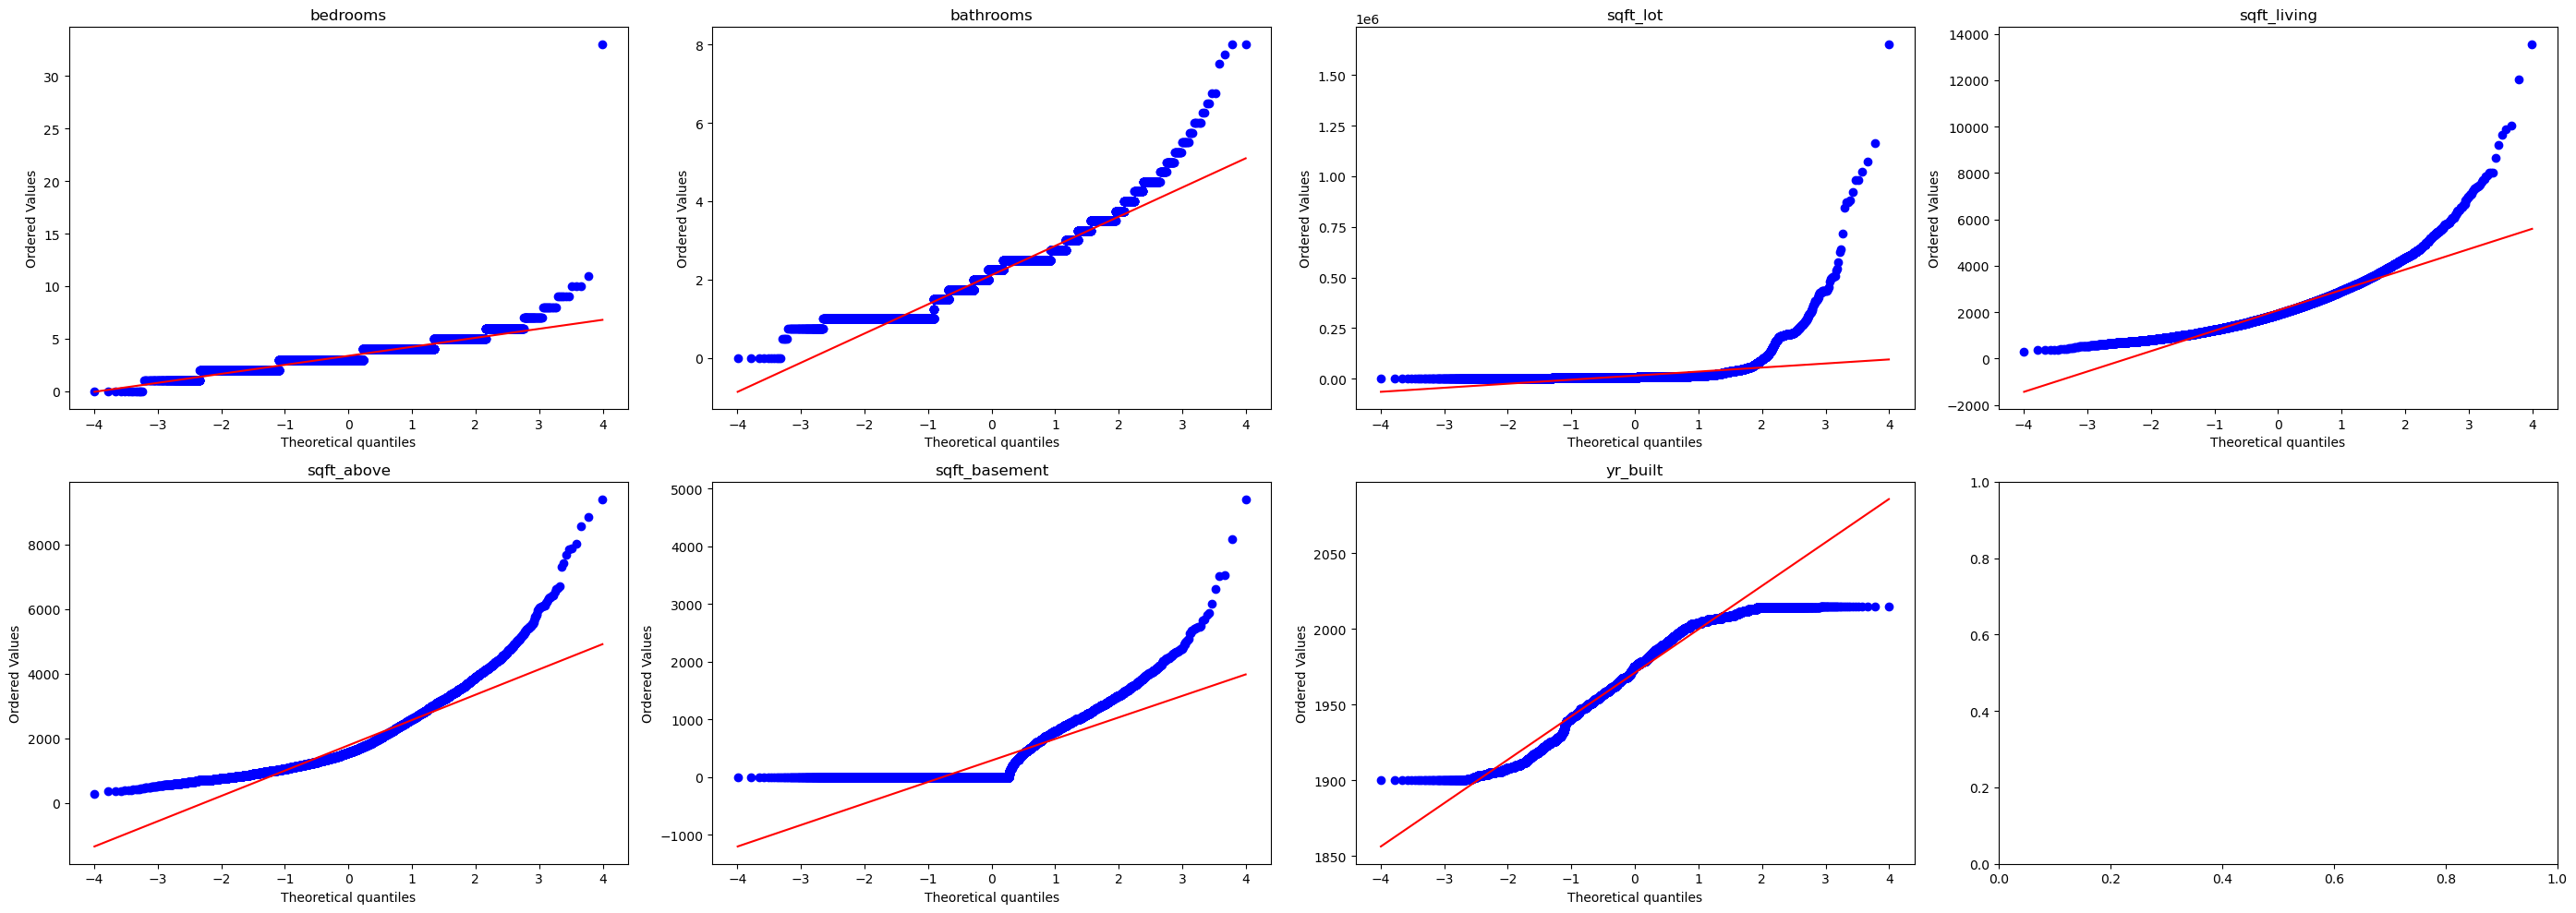

In [20]:
# Log Scaling 전 확률 플롯
ncols = 4
nrows = (len(log_col) + 3) // 4
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        idx = (r*ncols) + c
        if idx == len(log_col):
                break
        stats.probplot(df[log_col[idx]],plot=ax[r,c])
        ax[r,c].set_title(log_col[idx])
plt.tight_layout()
plt.show()

In [21]:
# Log Scaling
for col in log_col:
    df[col] = np.log1p(df[col])

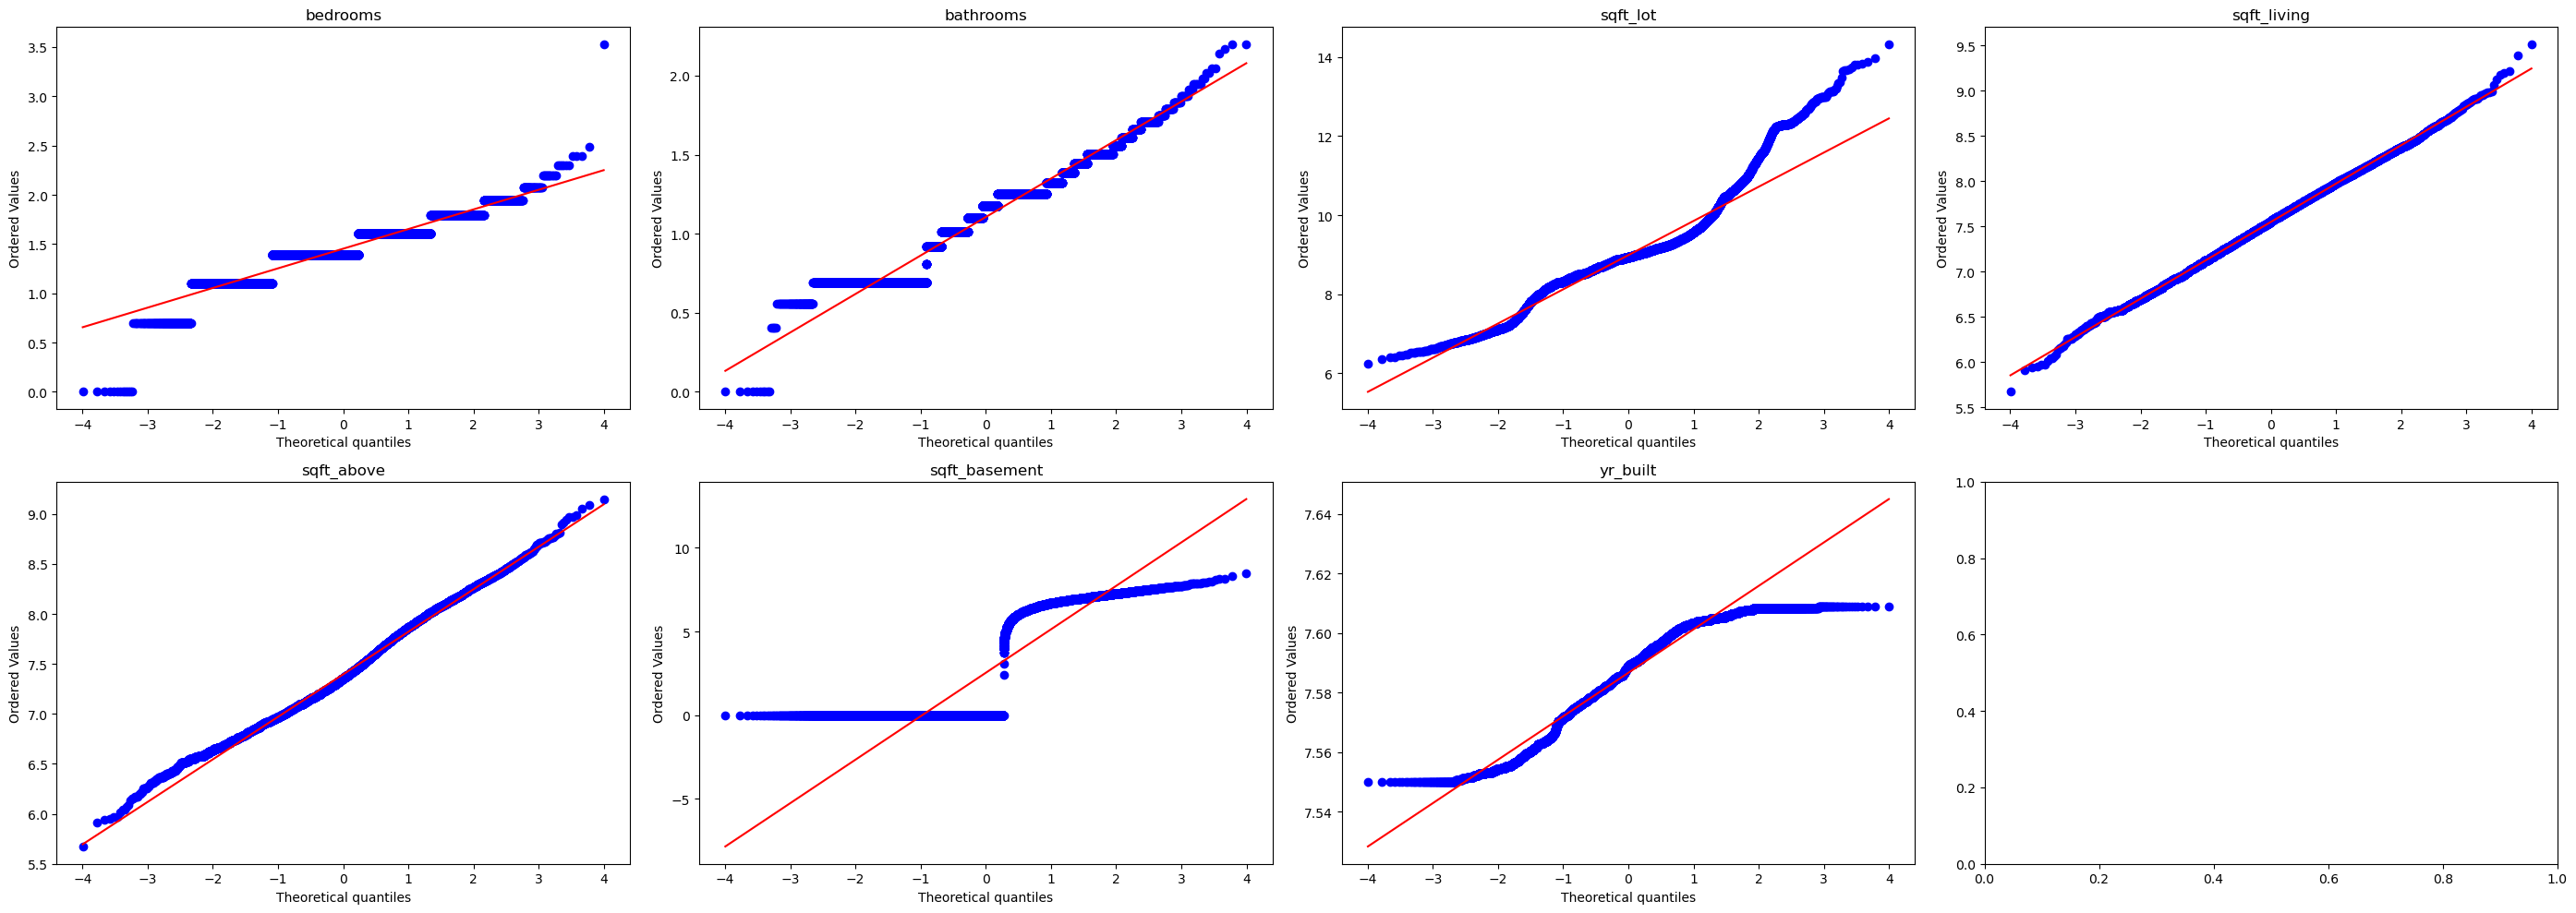

In [22]:
# Log Scaling 전 확률 플롯
ncols = 4
nrows = (len(log_col) + 3) // 4
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        idx = (r*ncols) + c
        if idx == len(log_col):
                break
        stats.probplot(df[log_col[idx]],plot=ax[r,c])
        ax[r,c].set_title(log_col[idx])
plt.tight_layout()
plt.show()

In [23]:
df = df[selected_col]

## Saving Processed Data 

x , y, sub

In [24]:
sub = df.iloc[len_train:,:]
x = df.iloc[:len_train,:]

In [25]:
sub.to_csv('sub.csv')

In [26]:
x.to_csv('x.csv')

In [29]:
pd.DataFrame(y).to_csv('y_csv')